# **UNEMPLOYMENT ANALYSIS WITH PYTHON**


## Data Retrivial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Oasis/Task1_DS/

/content/drive/MyDrive/Oasis/Task1_DS


In [ ]:
unemployment_data = pd.read_csv('Unemployment in India.csv')
unemployment_data_rate = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

## Data Understanding and Cleaning

### Unemployment Data

In [ ]:
print("Unemployment Data")
# print(unemployment_data.head())
unemployment_data_df = pd.DataFrame(unemployment_data)
print(unemployment_data_df.head(5))


null_values = unemployment_data_df.isnull().sum().sum()
print("Total Null Values Before Cleaning: ",null_values)

unemployment_data_df.dropna(inplace=True)
null_values = unemployment_data_df.isnull().sum().sum()
print("Total Null Values After Cleaning: ",null_values)

# Columns was having trailing spaces before, we removed it.
print(unemployment_data_df.columns)
unemployment_data_df['Date'] = unemployment_data_df[' Date'].str.strip()
unemployment_data_df['Date'] = pd.to_datetime(unemployment_data_df['Date'], format='%d-%m-%Y')
unemployment_data_df.columns = [
    col.strip() if col not in ['Region', 'Date'] else col
    for col in unemployment_data_df.columns
]

# Display the cleaned column names
print(unemployment_data_df.columns)

Unemployment Data
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Total Null Values Before Cleaning:  196
Total Null Values After

### Unemployement Rate

In [ ]:
# Create DataFrame
unemployment_data_rate_df = pd.DataFrame(unemployment_data_rate)

# Clean column names
unemployment_data_rate_df.columns = unemployment_data_rate_df.columns.str.strip()

# Check for null values
null_values_dr = unemployment_data_rate_df.isnull().sum().sum()
print("Total Null Values Before Cleaning: ", null_values_dr)

# Strip spaces from the Date column
unemployment_data_rate_df['Date'] = unemployment_data_rate_df['Date'].str.strip()

# Convert Date column to datetime
unemployment_data_rate_df['Date'] = pd.to_datetime(unemployment_data_rate_df['Date'], format='%d-%m-%Y')

# Display cleaned DataFrame head
print(unemployment_data_rate_df.head(5))


Total Null Values Before Cleaning:  0
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.91

## Initial Data Overview

In [ ]:
print(unemployment_data_rate_df.info())
print(unemployment_data_rate_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

## Unemployment Rate In all States

In [ ]:
# Calculate average unemployment rate by region
average_unemployment_by_region = unemployment_data_rate_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Sort by unemployment rate in descending order
average_unemployment_by_region = average_unemployment_by_region.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

# Round to two decimal places
average_unemployment_by_region['Estimated Unemployment Rate (%)'] = average_unemployment_by_region['Estimated Unemployment Rate (%)'].round(2)

# Display the result
print(average_unemployment_by_region)


              Region  Estimated Unemployment Rate (%)
7            Haryana                            27.48
23           Tripura                            25.06
10         Jharkhand                            19.54
2              Bihar                            19.47
4              Delhi                            18.41
17        Puducherry                            17.94
9    Jammu & Kashmir                            16.48
8   Himachal Pradesh                            16.07
19         Rajasthan                            15.87
21        Tamil Nadu                            12.19
5                Goa                            12.17
18            Punjab                            11.98
25       Uttarakhand                            11.16
26       West Bengal                            10.19
20            Sikkim                             9.79
24     Uttar Pradesh                             9.74
12            Kerala                             9.43
0     Andhra Pradesh        

**1. Haryana (27.48%) and Tripura (25.06%)** have the highest average unemployment rates. This indicates significant labor market challenges in these states, possibly due to economic factors, industry decline, or demographic shifts.




## Visualizing Unemployment Rates

<ipython-input-46-167293e0e349>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_unemployment_by_region, x='Estimated Unemployment Rate (%)', y='Region', palette='viridis')


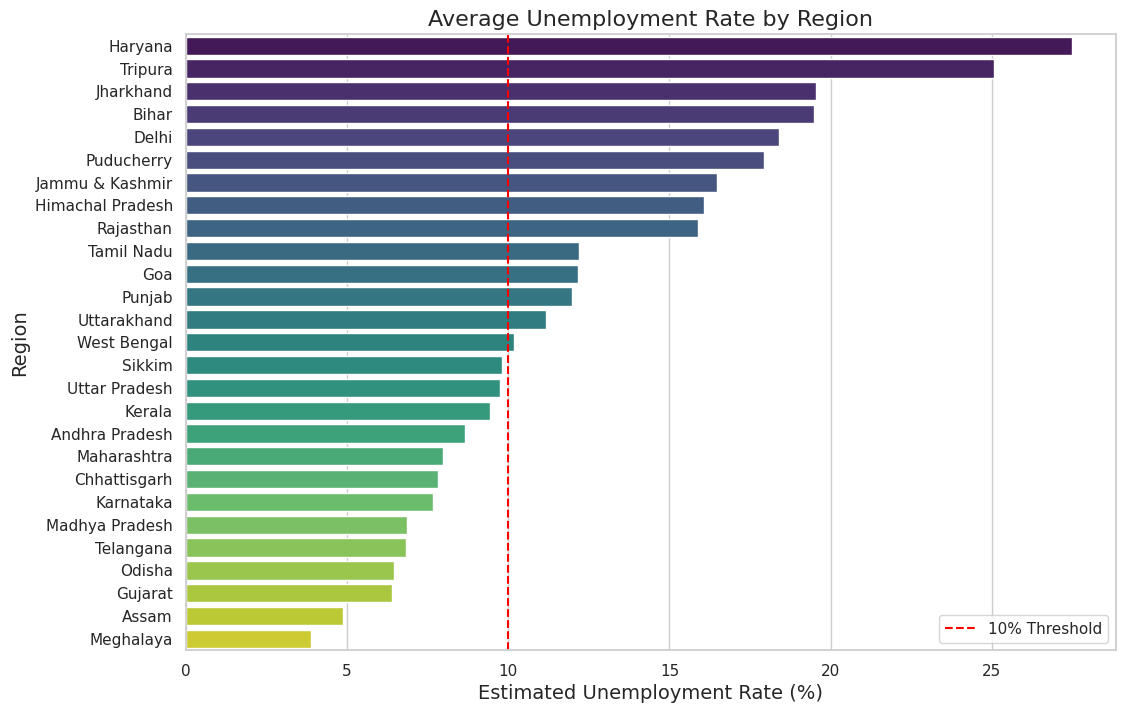

In [ ]:
sns.set(style="whitegrid")

# Create a bar plot for average unemployment rates
plt.figure(figsize=(12, 8))
sns.barplot(data=average_unemployment_by_region, x='Estimated Unemployment Rate (%)', y='Region', palette='viridis')
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.axvline(x=10, color='red', linestyle='--', label='10% Threshold')
plt.legend()
plt.show()

## Unemployment Rate Distribution

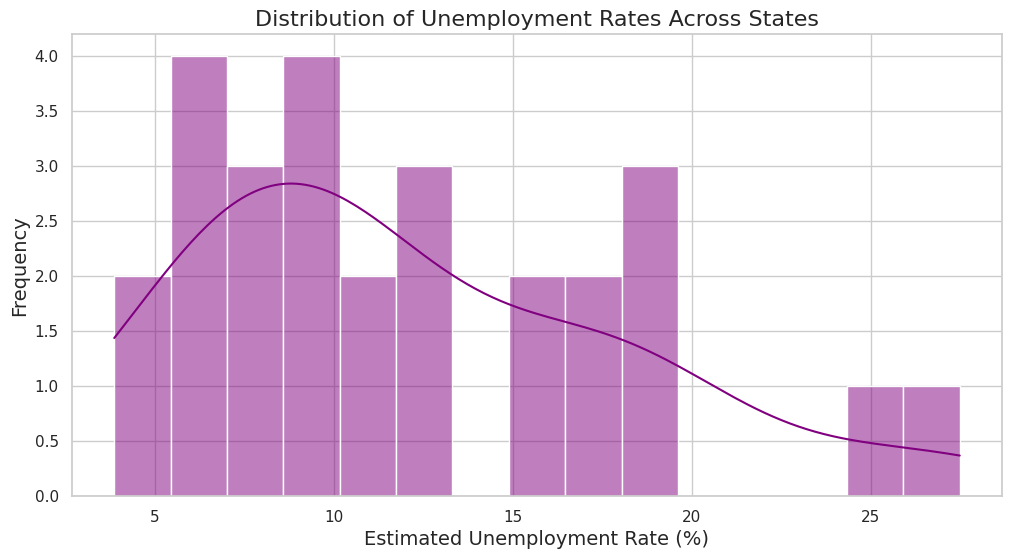

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(average_unemployment_by_region['Estimated Unemployment Rate (%)'], bins=15, kde=True, color='purple')
plt.title('Distribution of Unemployment Rates Across States', fontsize=16)
plt.xlabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


## Correlation Between Unemployment Rate and Employment Rates


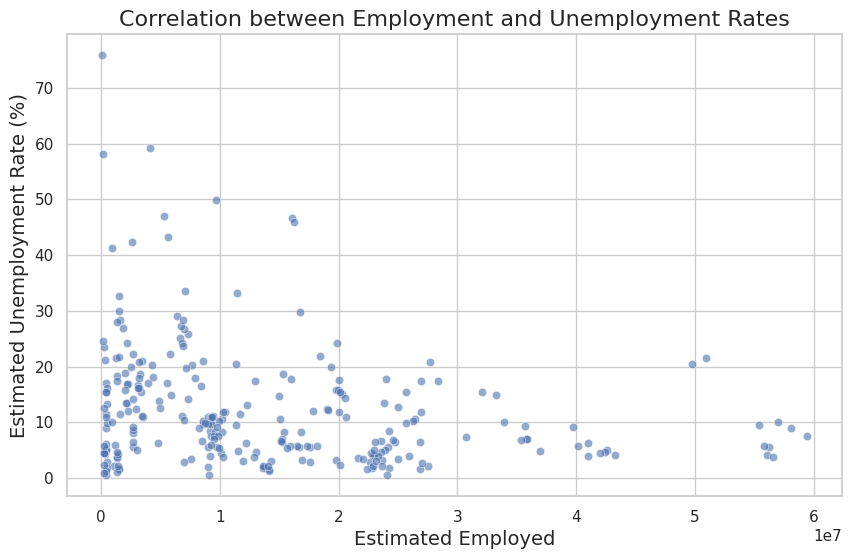

In [ ]:
# Assuming we have an employment column available in the dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=unemployment_data_rate_df, x='Estimated Employed', y='Estimated Unemployment Rate (%)', alpha=0.6)
plt.title('Correlation between Employment and Unemployment Rates', fontsize=16)
plt.xlabel('Estimated Employed', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.show()


## Average Unemployment Rate by Region (Boxplot)

<ipython-input-54-fa4b679a56cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unemployment_data_rate_df, x='Estimated Unemployment Rate (%)', y='Region', palette='Set3')


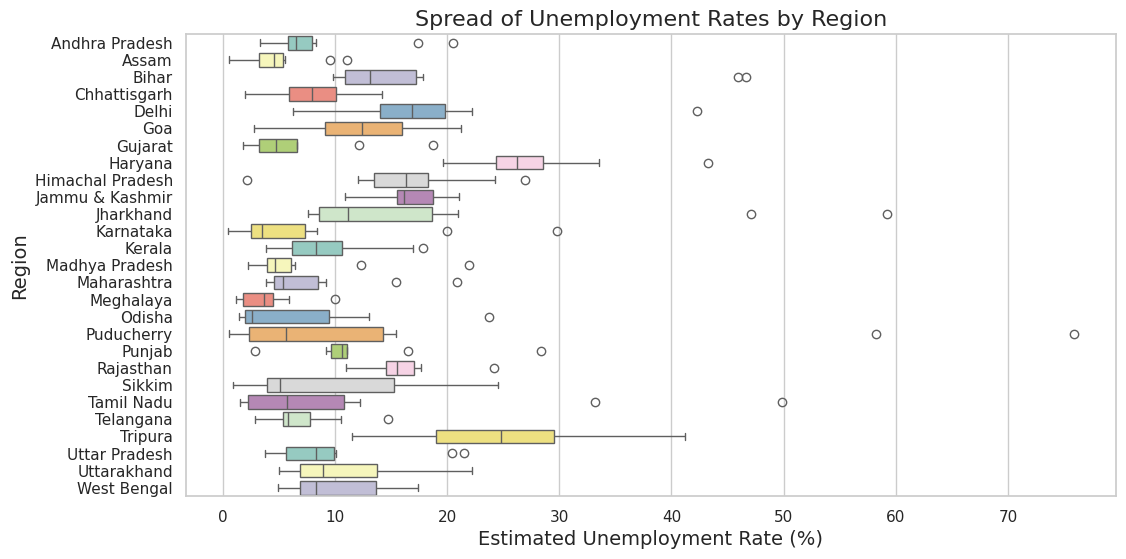

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=unemployment_data_rate_df, x='Estimated Unemployment Rate (%)', y='Region', palette='Set3')
plt.title('Spread of Unemployment Rates by Region', fontsize=16)
plt.xlabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.show()


## Comparison of Unemployment Rates Over Time

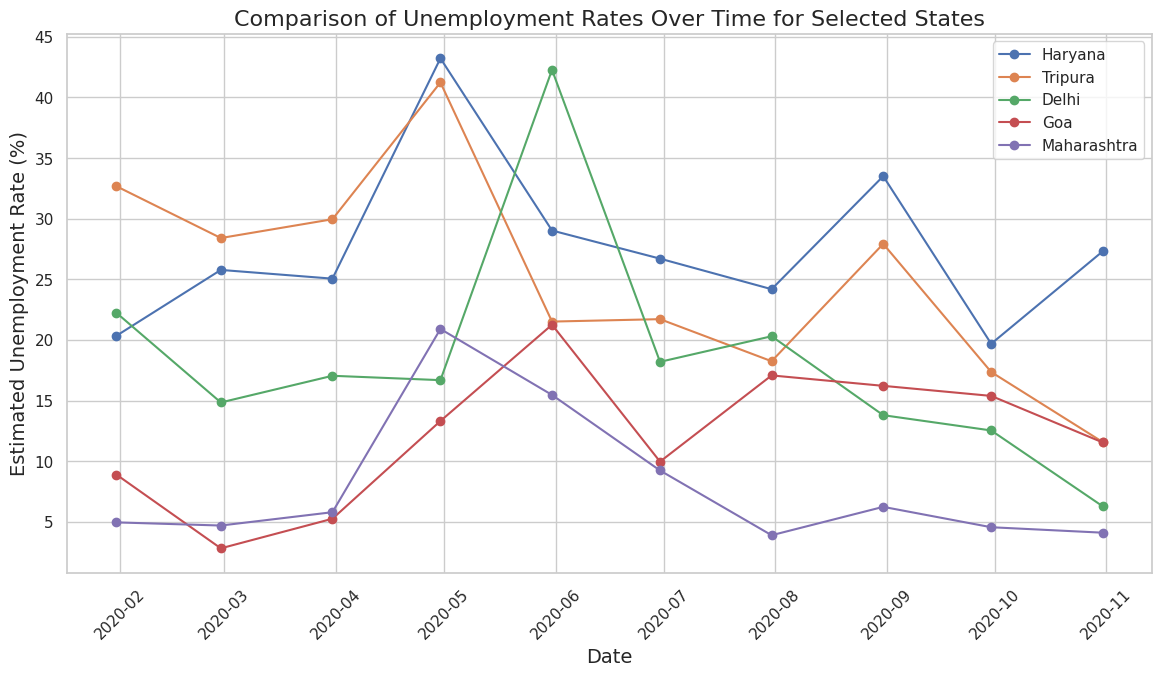

In [ ]:
selected_states = ['Haryana', 'Tripura', 'Delhi', 'Goa', 'Maharashtra']

plt.figure(figsize=(14, 7))
for state in selected_states:
    state_data = unemployment_data_rate_df[unemployment_data_rate_df['Region'] == state]
    plt.plot(state_data['Date'], state_data['Estimated Unemployment Rate (%)'], marker='o', label=state)

plt.title('Comparison of Unemployment Rates Over Time for Selected States', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Impact of COVID-19 on Unemployment Rates

<ipython-input-58-27da189e8db4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate (%)', estimator='mean', ci=None)


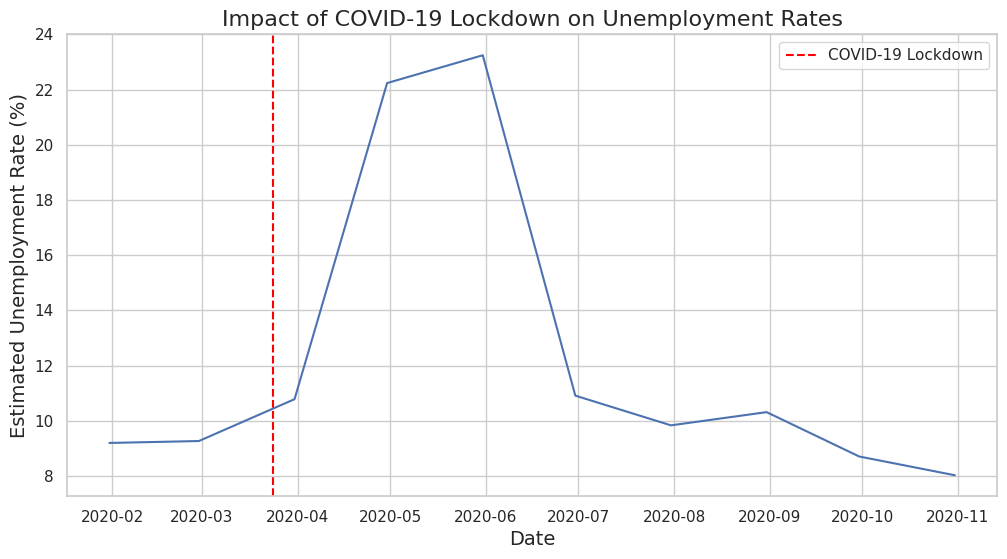

In [ ]:
plt.figure(figsize=(12, 6))
covid_data = unemployment_data_rate_df[(unemployment_data_rate_df['Date'] >= '2020-01-01') & (unemployment_data_rate_df['Date'] <= '2021-12-31')]
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate (%)', estimator='mean', ci=None)
plt.axvline(pd.Timestamp('2020-03-24'), color='red', linestyle='--', label='COVID-19 Lockdown')
plt.title('Impact of COVID-19 Lockdown on Unemployment Rates', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=14)
plt.legend()
plt.show()

## Haryana

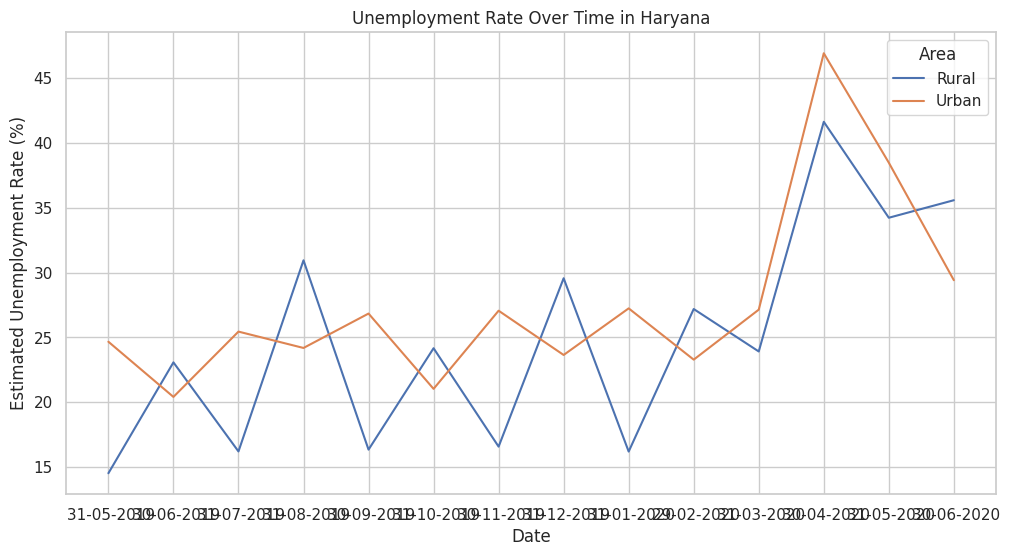

In [ ]:
haryana_data = unemployment_data[unemployment_data['Region'] == 'Haryana']

plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=haryana_data, hue='Area')
plt.title('Unemployment Rate Over Time in Haryana')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

##

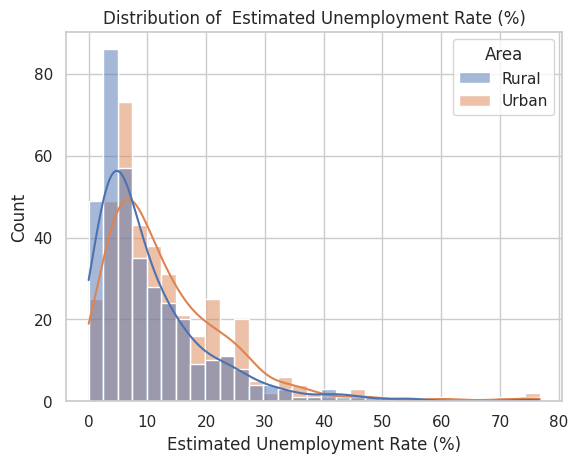

In [ ]:
sns.histplot(data=unemployment_data_df, x='Estimated Unemployment Rate (%)', kde=True, hue= 'Area')
plt.title('Distribution of  Estimated Unemployment Rate (%)')
plt.show()

## Estimated Employed

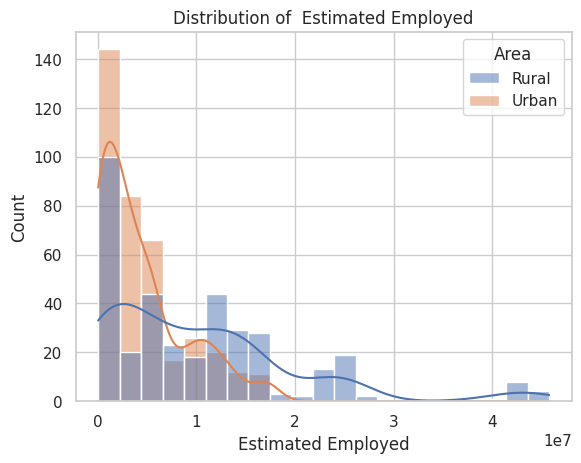

In [ ]:
sns.histplot(data=unemployment_data_df, x='Estimated Employed', kde=True, hue = 'Area')
plt.title('Distribution of  Estimated Employed')
plt.show()

## Time Series Analysis

<ipython-input-76-8ccbf1497b5f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = unemployment_data_rate_df.resample('M', on='Date')[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean()


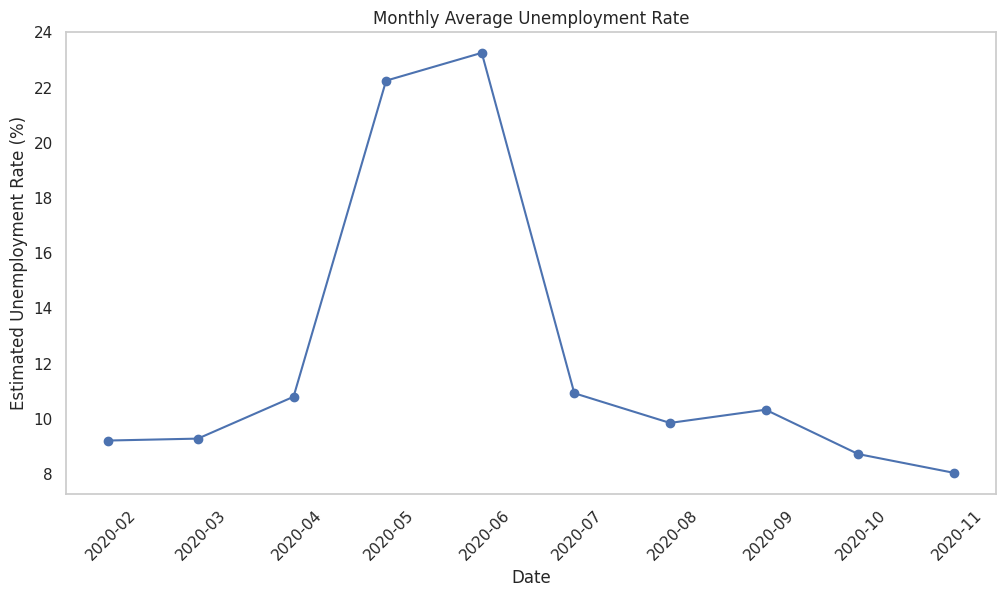

In [ ]:
# Resampling to get monthly averages if Date column exists
unemployment_data_rate_df['Date'] = pd.to_datetime(unemployment_data_rate_df['Date'])
# Explicitly selecting numeric columns for the mean calculation
monthly_data = unemployment_data_rate_df.resample('M', on='Date')[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean()
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## ANOVA Test

In [ ]:
import scipy.stats as stats  # Import the stats module from scipy

# ANOVA test for multiple states
state_groups = [group['Estimated Unemployment Rate (%)'].values for name, group in unemployment_data_rate_df.groupby('Region')]
f_stat, p_value = stats.f_oneway(*state_groups)  # Now 'stats' is defined and can be used
print(f'ANOVA F-statistic: {f_stat}, p-value: {p_value}')

ANOVA F-statistic: 4.15073690719187, p-value: 1.5684077901416773e-09


## Author  
### Ishan Rahul Surdi